Logboek ivar md

https://www.uniprot.org/uniprotkb/P07947/variant-viewer
mutand op 256
(T > N?)
>sp|P07947|YES_HUMAN Tyrosine-protein kinase Yes OS=Homo sapiens OX=9606 GN=YES1 PE=1 SV=3
MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSSAKGTAVNFSSLSMT
PFGGSSGVTPFGGASSSFSVVPSSYPAGLTGGVTIFVALYDYEARTTEDLSFKKGERFQI
INNTEGDWWEARSIATGKNGYIPSNYVAPADSIQAEEWYFGKMGRKDAERLLLNPGNQRG
IFLVRESETTKGAYSLSIRDWDEIRGDNVKHYKIRKLDNGGYYITTRAQFDTLQKLVKHY
TEHADGLCHKLTTVCPTVKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTT
KVAIKTLKPGTMMPEAFLQEAQIMKKLRHDKLVPLYAVVSEEPIYIVTEFMSKGSLLDFL
KEGDGKYLKLPQLVDMAAQIADGMAYIERMNYIHRDLRAANILVGENLVCKIADFGLARL
IEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILQTELVTKGRVPYPGMVNRE
VLEQVERGYRMPCPQGCPESLHELMNLCWKKDPDERPTFEYIQSFLEDYFTATEPQYQPG
ENL

## Les 1 Commands voor preproccessing

in /homestjerk/GIT/gromit ciftopdb script

innitialise grommit
source /usr/local/gromacs-2024.5/bin/GMXRC

grommit preproccessing
/homes/tsjerk/GIT/gromit/gromit.sh -f /students/2025-2026/MvK/Ivar_Yamila/mutand/mutand.pdb -ff amber99sb-ildn -time 100 -stop TPR


# Les 2 
TODO stappen van logging en checkpoint bestand
xtc, gro's voor pymol

pdb naar extisie
states inladen
source /usr/local/gromacs-2024.5/bin/GMXRC

alighment
plaatje filmpje

## Stappen Gromacs Even
SET PERIODIC BOUNDARY CONDITIONS 
Tijdens deze stap wordt een ruimte gemaakt voor de simulatie op een manier dat de ruimte geen grensen heeft maar omringt is door zichzelf. Daardoor kan een eiwit overlappen van de ene kant van de gesimuleerde ruimte naar de andere kant van de ruimte. Dit heeft als nadeel dat hierdoor er perodieke errors kunnen onstaan of het eiwit in zichzelf kan slaan als de ruimte niet groot genoeg is.  

Om de ruimte te fullen worden er triclinic unit cells gebruikt omdat deze spherisch er minder oplossings moleculen nodig zijn voor een molecul in plaats van een kubes gevormde unit cell.  

Gromacs gebruikt samen met Periodic boundy condiotions ook minimum image convention. Dit zorgt ervoor dat alleen het dichstbijzijnde deeltje gebruikt wordt om de interacties van niet gebonden deeltjes. Voor de lange afstands interacties wordt berkent met Ewald Sum en PME.  

Elke unit cell staat in verbinding met 26 andere cellen. Er zijn restricties in gromacs dat ervoor zorgt dat 1 molecuul niet bijde kanten van een macro molecuul kan zien.


https://manual.gromacs.org/current/reference-manual/algorithms/periodic-boundary-conditions.html

SOLVATION AND ADDING IONS 
Tijdens dit proces word de ruimte van de simulatie gevuld met een gekozen solvent zoals bijvoorbeeld water. Tijdens dit process kunnen er ook ander moleculen worden ingevoerd als dit zo aangegeven is.


POSITION RESTRAINT MD, NVT -- CYCLE THROUGH PRFC AND TEMP/TAU_T 

Tijdens deze stap word het eiwit in plaats gehouden en de ruimte op tempratuur gebracht zodat het eiwit aan elkaar blijft tijdens de simulatie statp



Wildype log notieties
Stap 1 
1191 hydrogen bonds
PDB file is aangepast op chain A
Stap 2 
niks biezonders
Stap 3
Note1 non zero charche van -2.0 getal is float inplaats van int. Systeem had geen ensamble temp
Note2 Coulomb cuttoff can artifacts genereren
Stap 4 
Note1 kwam terug als waarschuwing in deze stap
Note3 Start tempratuur was 0 hierna word een buffer gebruikt check energie drift
250/500 solvent atomen veranderd naar NA (NA ion of CL ions)
Stap 5 

Log conclusie 
kijk naar Chain A


# Les3

pip install MDAnalysis
misch pythom -m ipykernel install --user --name=MDA

Todo
RMSD -ivar
RMSF -yami

Secundairy structure -yami
PCA of anders (misch generate streamline) -ivar


# RMSD 
RMSD staat voor de Root Mean Square Deviation.  
In het geval van moluculaire dynamica word dit gebruikt om de afstand of gelijkheid tussen 2 moluculaire stucturen te vergelijken.  
Dit kan een idee geven over de verandering van de structuur over de tijd. Het nadeel hiervan is dat dit een 1 dimensionale weergave is en meerdere structuren dezelfde RMSD kunnen hebben.   
Om een beter beeld te krijgen gaan we zowel de 1 dimensionale RMSD doen als de Pairwise RMSD doen. Dit laat een RMSD van 1 frame tegenover alle andere frames zien. Dit kan op 2 manieren: een structuur tegen zichzelf of een structuur tegenover een andere structuur.   
In de diagonaal van dit type plot is de rmsd van het frame tegen zichzelf en de blokken die hieromheen zitten met een lage rmsd waarde geven een formverandering aan.

In [2]:
# RMSD
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap, align, rms

wildtype = mda.Universe("wildtype.pdb","wildtype.xtc")
mutand = mda.Universe("mutant_protein.pdb","mutand_xtc.xtc")
alignment = align.AlignTraj(wildtype, mutand,select="name CA", in_memory=True).run()

wildtype_dismatrix = diffusionmap.DistanceMatrix(wildtype,select="name CA").run()
mutand_dismatrix = diffusionmap.DistanceMatrix(mutand,select="name CA").run()

/home/ivar-lottman/Desktop/bioinformatica/jaar_3/periode_2/modeleren_van_kanker/molecular-dynamics/mvk/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# RMSD
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap, align, rms

wildtype = mda.Universe("wildtype.pdb","wildtype.xtc")
mutand = mda.Universe("mutant_protein.pdb","mutand_xtc.xtc")


In [4]:
# tjerks RMSD calculatie nog niet functioneel
selection = 'name CA or name N or name C or name O'
wt_bb = wildtype.select_atoms(selection)
m_bb = mutand.select_atoms(selection)

W = np.empty((len(wildtype.trajectory), len(wt_bb), 3))
for idx, frame in enumerate(wildtype.trajectory):
    W[idx] = wt_bb.positions.copy()

M = np.empty((len(mutand.trajectory), len(m_bb), 3))
for idx, frame in enumerate(mutand.trajectory):
    M[idx] = m_bb.positions.copy()

In [5]:
W -= W.mean(axis=1, keepdims=True)
M -= M.mean(axis=1, keepdims=True)

print(W.shape)
Wrmsd = np.empty((len(W), len(W)))
for idx, Xi in enumerate(W):
    U, L, Vt = np.linalg.svd(Xi.T @ W[idx:]/len(wt_bb))
    Wrmsd[idx, idx:] = (((Xi**2).sum() + (W[idx:]**2).sum(axis=(1,2)) - 2*L.sum(axis=1)) / len(wt_bb)) ** 0.5

#m_rmsd = (((W[0]**2).sum() + (W**2).sum(axis=(1,2)) - 2*L.sum(axis=1)) / len(m_ca)) ** 0.5

(2001, 2171, 3)


In [6]:
#Wrmsd.max()

In [7]:
import matplotlib.pyplot as plt

#plt.imshow(Wrmsd)

/home/ivar-lottman/Desktop/bioinformatica/jaar_3/periode_2/modeleren_van_kanker/molecular-dynamics/mvk/lib/python3.12/site-packages/MDAnalysis/analysis/diffusionmap.py:297: DeprecationWarning: The `dist_matrix` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.dist_matrix` instead.
  warnings.warn(wmsg, DeprecationWarning)


Text(0.5, 1.0, 'pairwise rmsd dist matrix wildtype to self')

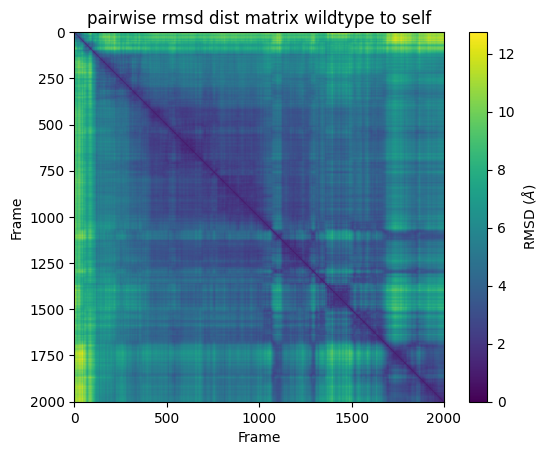

In [8]:
import matplotlib.pyplot as plt
plt.imshow(wildtype_dismatrix.dist_matrix, cmap='viridis')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
plt.title("pairwise rmsd dist matrix wildtype to self")

Vanuit de diagonaal is te zien dat het wildtype eiwit een paar keer van structuur veranderd waarvan in het begin frame ~500 tot frame ~1000 een wat grotere formverandering heeft en daarna meerdere kleinere veranderingen ondergaat.

Text(0.5, 1.0, 'pairwise rmsd dist matrix mutand to self')

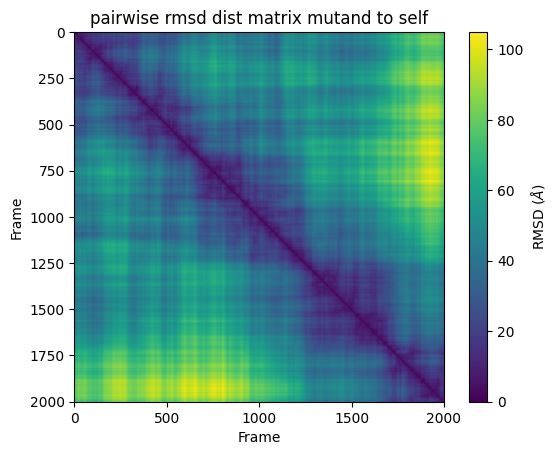

In [9]:
import matplotlib.pyplot as plt
plt.imshow(mutand_dismatrix.dist_matrix, cmap='viridis')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
plt.title("pairwise rmsd dist matrix mutand to self")

De mutand verschild van het wildtype op 2 manieren. Het meest opvallende is dat de amstrong waardes bijna onmogelijk hoog zijn. Het wildtype gaat van 0 tot 12 en de mutand van 0 tot 100. Wat hier precies de oorzaak van is is onduidelijk, wel heeft dit als gevolg dat de formverandering vanuit de diagonaal moeilijker te interperteren is.  
Vanwege de hoge amstrong waarde is het moeilijk om met zerkerheid te zeggen, maar langs de diagonaal vergeleken met het wiltype lijkt er wel een verschuifing te zijn van de ~500 tot ~1000 frame veranderingen.  

In [10]:
#pairwise rmsd
prmsd = np.zeros((len(wildtype.trajectory),len(mutand.trajectory)))

for i, frame_open in enumerate(wildtype.trajectory):
    r = rms.RMSD(mutand,wildtype, select='name CA',
                 ref_frame=i).run()
    prmsd[i] = r.rmsd[:, -1]  # select 3rd column with RMSD values

/home/ivar-lottman/Desktop/bioinformatica/jaar_3/periode_2/modeleren_van_kanker/molecular-dynamics/mvk/lib/python3.12/site-packages/MDAnalysis/analysis/rms.py:824: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


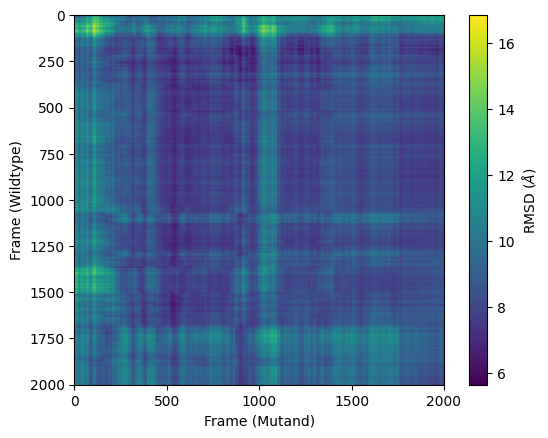

In [11]:
plt.imshow(prmsd, cmap='viridis')
plt.xlabel('Frame (Mutand)')
plt.ylabel('Frame (Wildtype)')
plt.colorbar(label=r'RMSD ($\AA$)')

Bij de 2d vergelijking van het wildtype tegen de mutand geven de blokken met lage rmsd waardes een vergelijkbare staten zitten en andersom in andere staten zitten.
in dit geval komt er veel overeen behalve op de wildtype 1300 tot 1500 en mutand 0 tot 500 frames en wildtype 0 tot 100 en de mutand 0 tot 100 en 1000 tot 1100 blokken.  
Ook valt het op dat bij de ~1000 frame van de mutand tegenover het wildtype alle rmsd waardes hoger liggen dan gemiddeld in de rest van het plot.
De 0 tot eind hoeken van de mutand en het wildtype tegenover de 0 tot 500 blokken van de mutand en wildtype lijken ook iets verhoogt te zien tegenover de rest van het plot.  

In [12]:
import MDAnalysis.analysis.rms
import pandas as pd
mutation_zone = 'backbone and resid 250-270'
one_d_rmsd = MDAnalysis.analysis.rms.RMSD(mutand,wildtype, select="backbone",groupselections=[mutation_zone],ref_frame=0).run()
df = pd.DataFrame(one_d_rmsd.results.rmsd,
                  columns=['Frame', 'Time (ns)',
                           'Backbone',
                           'mutation_zone'])

Text(0, 0.5, 'RMSD ($\\AA$)')

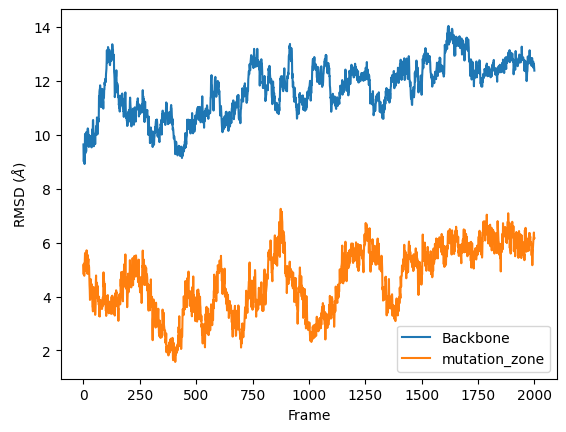

In [13]:
ax = df.plot(x='Frame', y=['Backbone', 'mutation_zone'],
             kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

De 1 dimensionale RMSD laat zien dat de structuren een onstabiele RMSD waardes hebben waarvan de mutand rond de 250 en 1000 frames erg fluctueeren.

In [14]:
#Ramachandran
from MDAnalysis.analysis.dihedrals import Ramachandran
# mutatie gebied 254-258
# wildtype 1 tm 4280 atoms when hydrogen removed
selec_wild = wildtype.select_atoms("resid 250-270")
# mutand 1 tm 4281 atoms when hydrogen removed
selec_mutant = mutand.select_atoms("resid 250-270")

rama_wild = Ramachandran(selec_wild).run()
rama_mutand = Ramachandran(selec_mutant).run()

#rama_mutand.plot()

In [22]:
#rama_wild.results

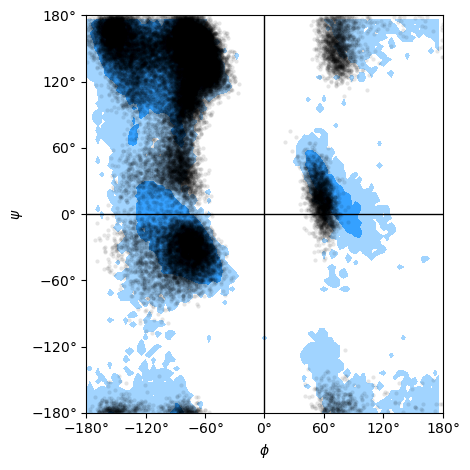

In [16]:
fig, ax = plt.subplots(figsize=plt.figaspect(1))
rama_wild.plot(ax=ax, color='k', marker='.', ref=True, alpha=0.1,linewidths=0.01)
fig.tight_layout()

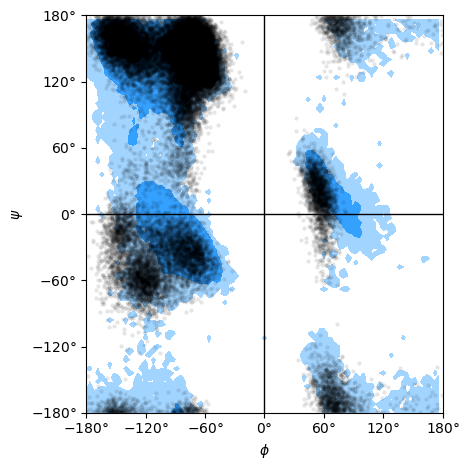

In [21]:
fig, ax = plt.subplots(figsize=plt.figaspect(1))
rama_mutand.plot(ax=ax, color='k', marker='.', ref=True, alpha=0.1,linewidths=0.01)
fig.tight_layout()

De Ramachandran Analyse weergeeft de backbone phi backbone en de psi hoeken waarbij de blauwe achtergrond de toegestaande regio's zijn.
Als je de 2 plotjes met elkaar vergijkt zie je dat zowel de wildtype als de mutand punten hebben buiten de toegestaande regio. en dat ze onderling ook verschillen in onderste gebieden in zowel expresie als locatie

Les PCA notitie code
intrafit ca
remove hydrogens
x = np.array([cmd.get_model('wildtype', state=idx+1).get_coord_list() for idx in range(cmd.count_states('wildtype'))])
x.mean(axis=1)
mean = x.mean(axis=0)
x =(x-mean).reshape((len(x),-1))
vals, vecs = np.linalg.eigh(x@(x.T/len(x)))
loadings = x.T @ vecs[:,::-1]
loadings/= (loadings ** 2).sum(axis-0, keepdims=True)**0.5
scores = x@loadings

loadings  
l1 loadingsp [:,0].reshape((-1,3))
s1 = scores [:,0]

smin = s1.min()*l1 + mean
smax = s1.max()*s1 + mean

CGO compiled grafic obj cylinder hoor 9.0
[9.0 , xs ys zs xe ye ze raduis rs gs bs re ge be]
cmd.load_cgo([
    u
    for (xs,ys,zs),(xe,ye,ze) in zip(xmin,xmax)
    for u in [9.0, xs,ys,zs,xe,ye,ze,0.1, [0,0,1],[1,0,0]]
],'pc1')

M = cmd.get_model('wildtype')
for idx, mx in enumerate(mean)
    M.atom[idx].coord = list(mx)

cmd.load_model(M,'mean')



In [ ]:
#pymol

In [20]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.pca as pca
#import MDAnalysis.visualization.streamlines as mdas

wildtype = mda.Universe("wildtype.pdb","wildtype.xtc")
mutand = mda.Universe("mutant_protein.pdb","mutand_xtc.xtc")
PSF_pca = pca.PCA(wildtype, select="backbone")
PSF_pca.run()

n_pcs = np.where(PSF_pca.cumulated_variance > 0.95)[0][0]

atomgroup = wildtype.select_atoms('backbone')

#pca_space = PSF_pca.transform(atomgroup, n_components=n_pcs)
#pca_space

/home/ivar-lottman/Desktop/bioinformatica/jaar_3/periode_2/modeleren_van_kanker/molecular-dynamics/mvk/lib/python3.12/site-packages/MDAnalysis/analysis/pca.py:370: DeprecationWarning: The `cumulated_variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.cumulated_variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


# PCA en Mean trajectory wildtype


<img src="pymol_ray_2.png" width="60%">


Hierboven staat een visualisatie van het wildtype YES1 eiwit waarbij de blauw rode lijnen de richting van de trajectory van begin naar eind visualiseren. wat hier te zien is dat de kern van het eiwit een stabiele beweging heeft maardat de loops aan de zijkant van het eiwit verplaatsen naar het eiwit toe en dat het een vrij lange beweging maakt langs het eiwit

<img src="pymol_select_reg_mean_v_normal3.png" width="60%">


Normaals dezelfde pca wildtype met pca visualisatie maar dan vanuit een andere hoek gecentreerd op het mutatie gedeelte dat cyaan gekleurt is. Dit gedeelte zit tussen het SH2 en Protein kinase domein. zoals te zien hierboven heeft dit een korte beweging dat in lijn is met de rest van het eiwit.

<img src="pymol_select_reg_mean_v_normal.png" width="60%">

Hierboven is een visualisatie van het wildtype eiwit naast het gemiddelde van de pca gecentreerd op het gebied van yes1, hierin is de blauw groene keten van het eiwit en het oranje groene keten weergeeft de plek van het gemiddelde weer. zoals te zien is in het geval van het wildtype ligt deze niet ver van het startpunt af en houd het dezelfde formatie aan totdat het naar het blauwgekleurde domein loopt waar het wel dezelfde vorm behoud maar verder van de startpositie afligt. 

<img src="pymol_select_reg_mean_v_normal2.png" width="60%">


Andere hoek van het gemiddelde tegenover het eiwit.

<img src="pymol_select_reg_mean_v_pca.png" width="60%">

Hierboven staat de visualisatie van de pca van het wildtype als blauwrode lijnen en de ketens het gemidelde gecentreerd op het gebied waar de mutatie zich kan plaatsvinden. zoals tezien lopen de lijnen consistend met het gemiddelde.

<img src="pymol_select_reg.png" width="60%">


Andere hoek van de pca v gemidelde visualisatie

# Conclusie sugestie

zoals te zien is het gedeelte waarin de mutatie zich plaatsvind in een ketting die die het kinase en sh2? domein linkt. als de mutatie deze interactie flexibeler maakt kan het ertoe lijden dat door een meer open structuur er overexpressie plaats vind van dit eiwit wat een verklaring kan zijn dat het carcinogeen is


<video src="movement_mean_fast2.mp4" width="320" height="240" controls></video>

<video src="movement_mean.mp4" width="320" height="240" controls></video>

<video src="movement_pca.mp4" width="320" height="240" controls></video>